In [33]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv("../processed_data/2018_Data_Ratios.csv")

# convert 'Name' column into row indices
df.set_index('Name', inplace=True)

# remove ticker column
df_ticker = df['Ticker']
df = df.drop(columns=['Ticker'])

# display
display(df)

,Net cash flow / Change in cash,Average Payables,Average Receivables,currentRatio,SG&A to Revenue,daysOfPayablesOutstanding,daysOfInventoryOutstanding,eBITperRevenue,Intangibles to Total Assets,Debt to Assets,Debt to Equity,Payout Ratio,ROE,R&D to Revenue,PE ratio,returnOnAssets,Dividend Yield
Name,,,,,,,,,,,,,,,,,
Comcast Corporation,0.434656,2.432763,0.858468,-0.721818,0.049681,-0.051034,-0.047371,0.095818,1.825931,0.289072,-0.008118,0.042963,-0.042589,-0.063362,-0.137455,-0.015649,0.106519
Sirius XM Holdings Inc.,-0.065754,0.021661,-0.111580,-1.151627,-0.077219,-0.047671,-0.049130,0.114464,1.477677,1.425742,-0.181279,-0.064627,-0.369301,-0.052236,-0.007835,-0.275540,-0.239916
"Caesars Entertainment, Inc.",-1.541373,-0.119710,-0.086995,-0.485803,-0.071077,-0.054814,-0.048793,0.093217,0.108227,1.129319,0.130982,-0.165238,-0.071030,-0.063362,-0.105562,-0.057896,-0.383959
Ford Motor Company,-2.506642,7.542923,11.830484,-0.439431,-0.120404,-0.047074,-0.032826,0.068101,-1.080549,0.736843,0.080267,0.209873,-0.067364,-0.063362,-0.213410,-0.050788,1.045538
"NIKE, Inc.",0.581082,0.507762,0.222361,0.464484,-0.052569,-0.053468,-0.047859,0.082693,-0.995450,-0.494456,-0.046045,0.206383,-0.029214,-0.063362,0.566496,-0.039480,-0.190685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Takung Art Co., Ltd.",-0.080841,-0.243141,-0.134803,-0.172963,0.257943,0.008058,-0.032664,-0.088940,-1.076622,-0.686561,-0.050886,-0.165238,-0.402255,-0.063362,-0.336521,-0.177498,-0.383959
"Urban One, Inc.",-0.077009,-0.228261,-0.124178,-0.193035,-0.023106,-0.049993,-0.044319,0.092810,2.541641,1.125329,0.109975,-0.165238,0.215760,-0.063362,-0.326398,0.177080,-0.383959
Vince Holding Corp.,-0.068010,-0.233980,-0.133691,-0.020003,0.002124,-0.051670,-0.048314,0.101921,1.125059,-0.384722,-0.037541,-0.165238,0.207139,-0.063362,-0.321866,0.067212,-0.383959


In [35]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
kmeans.fit(df)

KMeans()

In [36]:
kmeans.inertia_

2362.33498403192

c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecat

Text(0, 0.5, 'Inertia')

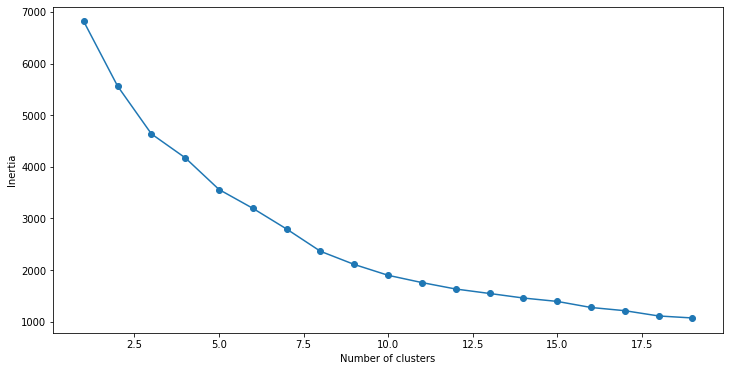

In [37]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [38]:
numclus = 8
kmeans = KMeans(n_jobs = -1, n_clusters = numclus, init = 'k-means++')
kmeans.fit(df)
labels = kmeans.predict(df)

c:\users\trieu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [39]:
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    270
7    137
4      3
6      2
5      2
3      1
2      1
1      1
Name: cluster, dtype: int64

In [40]:
print(kmeans.cluster_centers_)

[[ 8.62335679e-02 -2.76092230e-02 -7.05049940e-02  1.33625885e-01
  -4.53107715e-02 -4.71668323e-02 -4.72325426e-02  3.86026614e-02
  -5.35872748e-01 -3.57142163e-01 -4.59797314e-02 -8.97431512e-02
  -2.10314165e-02 -3.75808881e-02 -4.93975453e-02 -5.03786336e-02
  -9.03816281e-02]
 [-4.49628790e-02 -2.43144071e-01 -1.33932114e-01 -1.18138835e+00
   7.27809725e-02  2.14061452e+01  2.14235542e+01  7.83638245e-02
   1.45542046e+00 -2.19123607e-01  2.82209932e-02 -1.47376358e+00
  -1.08696579e-01 -6.33623813e-02 -3.36520876e-01 -6.06409155e-02
   1.01271756e+00]
 [-4.99983271e-02 -2.44095373e-01 -1.35240438e-01  2.14453270e-03
   2.07534464e+01  6.15076759e-01 -5.00511581e-02 -1.95719654e+01
  -1.08054935e+00 -5.06751804e-02 -4.02595875e-02 -1.65238073e-01
  -6.60442316e-01  2.08150719e+01 -3.36520876e-01 -2.32120637e-01
  -3.83959294e-01]
 [-4.49965013e-02 -2.44215360e-01 -1.35095927e-01 -6.06232897e-01
   2.55909638e+00  2.96835127e-02  1.03480582e-01 -3.82810671e+00
  -1.26996772e-01 -

In [41]:
print(kmeans.labels_) # respective cluster for each company (company at index 1 is in cluster 1)

[7 7 7 4 0 0 4 0 0 7 7 0 0 7 0 7 0 0 0 0 7 0 0 0 0 0 0 7 0 0 7 0 0 7 7 0 0
 7 7 0 0 0 0 7 0 7 0 0 7 0 7 0 0 0 0 0 0 0 7 7 0 7 0 7 7 0 0 0 0 7 0 0 0 7
 0 0 7 7 7 0 0 0 0 6 7 7 7 7 7 0 7 0 5 7 0 0 7 0 7 7 0 0 0 0 0 7 0 7 7 0 7
 0 0 0 0 0 7 0 0 0 7 0 0 7 0 7 0 0 7 0 7 0 7 0 0 0 7 7 0 7 7 0 7 0 0 7 0 0
 0 0 0 0 7 0 0 0 0 0 0 0 7 0 7 0 7 7 0 0 0 0 0 0 0 0 0 7 7 7 0 7 7 0 7 7 0
 0 0 0 0 7 0 7 5 0 0 0 0 7 0 0 7 0 0 0 0 0 0 0 7 0 0 7 7 0 7 0 7 0 0 7 0 0
 0 7 0 7 7 7 0 7 0 7 0 0 7 0 0 0 0 7 7 0 7 0 0 0 7 7 0 7 0 0 0 4 0 0 0 0 7
 0 7 7 7 0 7 0 0 7 0 0 7 7 0 7 7 7 7 7 0 0 7 7 7 7 7 0 0 0 0 0 7 0 7 7 0 0
 0 0 0 7 0 7 0 0 0 0 0 0 0 7 0 7 0 0 7 0 0 0 7 0 0 7 0 0 0 0 0 0 0 7 0 0 7
 0 0 0 0 0 7 0 0 0 7 0 7 0 0 0 0 7 7 0 0 0 0 0 0 0 7 0 0 7 7 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 6 0 0 0 0 0 0 0 0 0 7 0 0 1 0 0 2 7 0 7 0 0 0 7 0 0
 0 7 0 7 0 0 7 7 0 7]


##### Export to CSV File

In [43]:
df.to_csv("../processed_data/2018_Clusters_Ratios.csv");

##### Export to JSON

In [45]:
df_clusters_only = df[['cluster']]
df_clusters_only = df_clusters_only.reset_index()
df_clusters_only['ticker'] = df_ticker.to_numpy()
df_clusters_only = df_clusters_only.rename(columns={"Name": "name"})
df_clusters_only.to_json (r'../processed_data/2018_Clusters_Ratios.json', orient='records')